In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import streamlit as st
import sklearn as sk
from IPython.core.pylabtools import figsize
from sklearn.ensemble import GradientBoostingRegressor

from Logistic_regression_Model import one_vs_rest_train, one_vs_rest_predict

In [2]:
data = pd.read_csv("train_dataset.csv")
df = pd.DataFrame(data)
test_data = pd.read_csv("test_dataset.csv")
# st.write(train_data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1900 non-null   object 
 1   Age                             1900 non-null   int64  
 2   Height                          1900 non-null   float64
 3   Weight                          1900 non-null   float64
 4   family_history_with_overweight  1900 non-null   object 
 5   FAVC                            1900 non-null   object 
 6   FCVC                            1888 non-null   float64
 7   NCP                             1900 non-null   float64
 8   CAEC                            1900 non-null   object 
 9   SMOKE                           1900 non-null   object 
 10  CH2O                            1900 non-null   float64
 11  SCC                             1900 non-null   object 
 12  FAF                             19

In [4]:
print(df.shape)
print(df.describe())
df.head()

(1900, 17)
               Age       Height       Weight         FCVC          NCP  \
count  1900.000000  1900.000000  1900.000000  1888.000000  1900.000000   
mean     24.284211     1.701416    86.515363     2.417272     2.682968   
std       6.287165     0.093077    26.157025     0.536367     0.780401   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      20.000000     1.630000    65.812500     2.000000     2.660000   
50%      23.000000     1.700000    83.000000     2.380000     3.000000   
75%      26.000000     1.770000   107.050000     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  1900.000000  1900.000000  1900.000000  
mean      2.015832     1.004505     0.663579  
std       0.611293     0.853269     0.608729  
min       1.000000     0.000000     0.000000  
25%       1.610000     0.110000     0.000000  
50%       2.000000     1.000000     0.63

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,18,1.82,142.10,yes,yes,3.00,3.00,Sometimes,no,2.71,no,2.00,0.814,Sometimes,Public_Transportation,Obesity_Type_III
1,Male,32,1.84,98.26,yes,yes,2.33,1.82,Sometimes,no,2.56,no,1.33,0.481,Sometimes,Automobile,Overweight_Level_II
2,Male,24,1.76,117.33,yes,yes,1.54,3.00,Sometimes,no,2.00,no,1.63,0.631,NaN,Public_Transportation,Obesity_Type_II
3,Female,26,1.62,110.68,yes,yes,3.00,3.00,Sometimes,no,2.69,no,0.00,0.425,NaN,Public_Transportation,Obesity_Type_III
4,Male,32,1.78,121.20,yes,yes,2.76,3.00,Sometimes,no,2.16,no,0.43,0.716,NaN,Automobile,Obesity_Type_II


In [5]:
df.nunique()

Gender                               2
Age                                 39
Height                              51
Weight                            1214
family_history_with_overweight       2
FAVC                                 2
FCVC                               177
NCP                                242
CAEC                                 4
SMOKE                                2
CH2O                               201
SCC                                  2
FAF                                253
TUE                                765
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [6]:
for i in df:
    if df[i].nunique() <= 5:
        print(i, ': ', pd.unique(df[i]))

Gender :  ['Female' 'Male']
family_history_with_overweight :  ['yes' 'no']
FAVC :  ['yes' 'no']
CAEC :  ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE :  ['no' 'yes']
SCC :  ['no' 'yes']
CALC :  ['Sometimes' nan 'no' 'Frequently' 'Always']
MTRANS :  ['Public_Transportation' 'Automobile' 'Motorbike' 'Walking' 'Bike']


In [7]:
for i in df:
    if df[i].isna().sum():
        print(i, ': ', df[i].isna().sum(), type(df[i][0]))

FCVC :  12 <class 'numpy.float64'>
CALC :  28 <class 'str'>


In [8]:
print(df.duplicated().sum())

22


In [9]:
df = df.drop_duplicates()
# mode_value = df['CALC'].mode()[0]
df['CALC'] = df['CALC'].fillna(df['CALC'].mode()[0])
df['FCVC'] = df['FCVC'].fillna(df['FCVC'].mean())

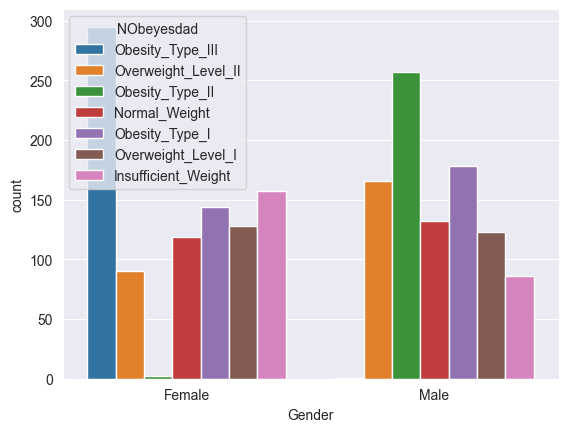

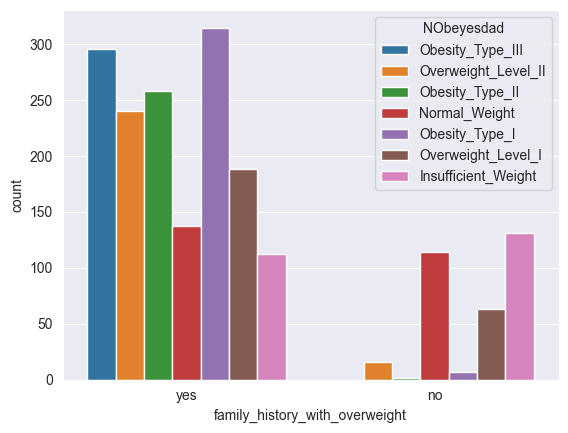

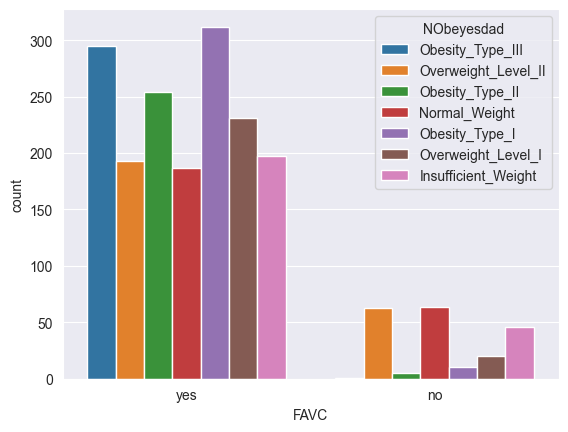

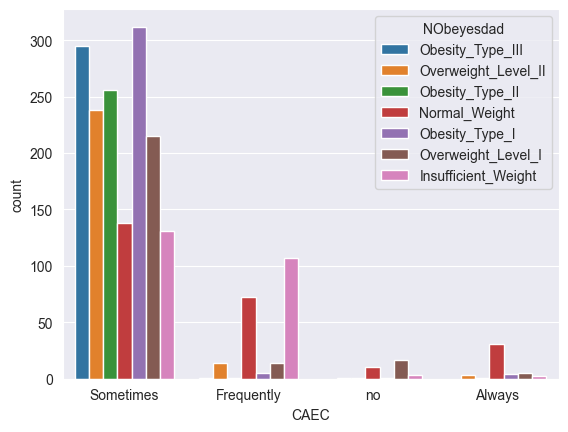

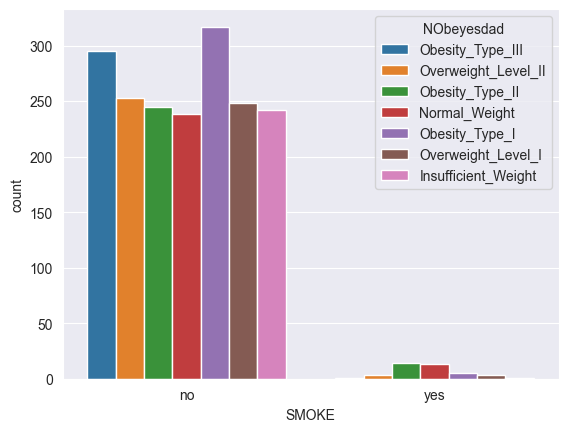

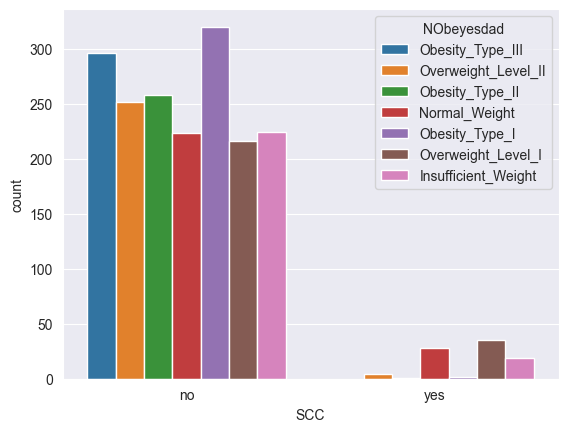

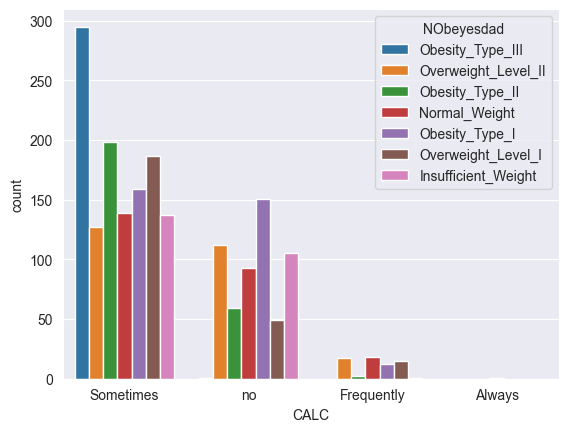

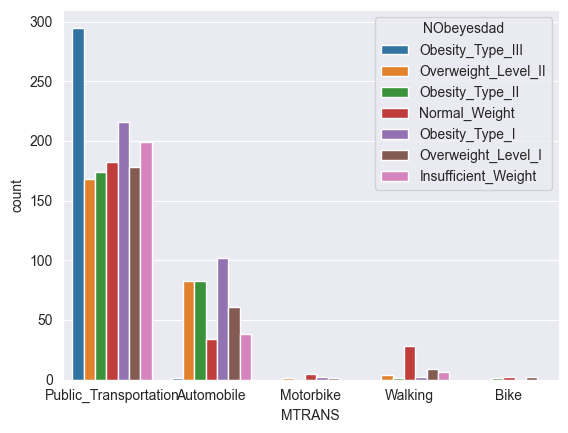

In [10]:
import seaborn as sns
for i in df:
    if df[i].nunique() <= 5:
        plt.figure()
        sns.countplot(data = df, x = i, hue ="NObeyesdad")
        plt.show()

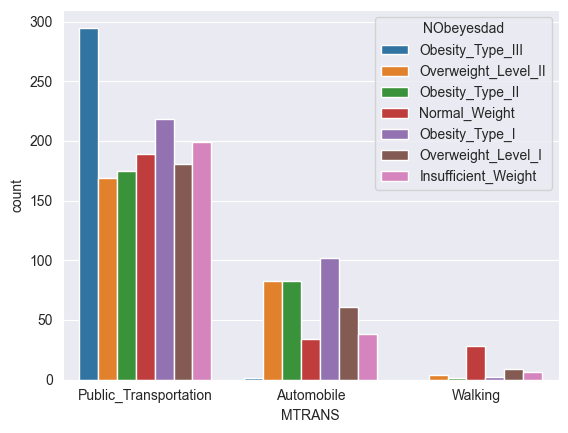

In [11]:
df['MTRANS'] = df['MTRANS'].replace({'Motorbike': 'Public_Transportation', 'Bike': 'Public_Transportation'})
df['CALC'] = df['CALC'].replace('Always', 'Frequently')
plt.figure()
sns.countplot(data = df, x = 'MTRANS', hue ="NObeyesdad")
plt.show()

In [12]:
print(df[(df['NObeyesdad'] == 'Obesity_Type_III') & (df['Gender'] == 'Male')])

    Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
905   Male   18    1.87   173.0                            yes  yes   3.0   

     NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
905  3.0  Frequently    no   2.0  no  2.0  1.0  Sometimes   

                    MTRANS        NObeyesdad  
905  Public_Transportation  Obesity_Type_III  


In [13]:
print(df[(df['NObeyesdad'] == 'Obesity_Type_II') & (df['Gender'] == 'Female')])

      Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
1688  Female   25    1.63    93.0                             no   no   3.0   
1717  Female   24    1.60   100.5                            yes  yes   3.0   

      NCP       CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
1688  4.0     Always    no   1.0  no  2.0  0.0         no   
1717  1.0  Sometimes    no   1.0  no  0.0  2.0  Sometimes   

                     MTRANS       NObeyesdad  
1688  Public_Transportation  Obesity_Type_II  
1717  Public_Transportation  Obesity_Type_II  


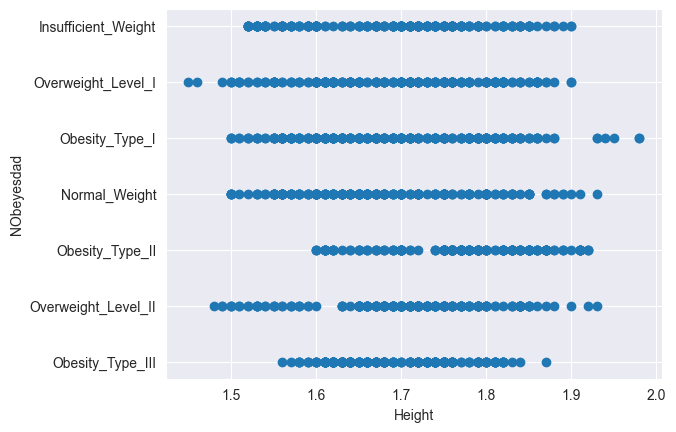

In [14]:
plt.scatter(df['Height'], df['NObeyesdad'])
plt.xlabel('Height')
plt.ylabel('NObeyesdad')
plt.show()

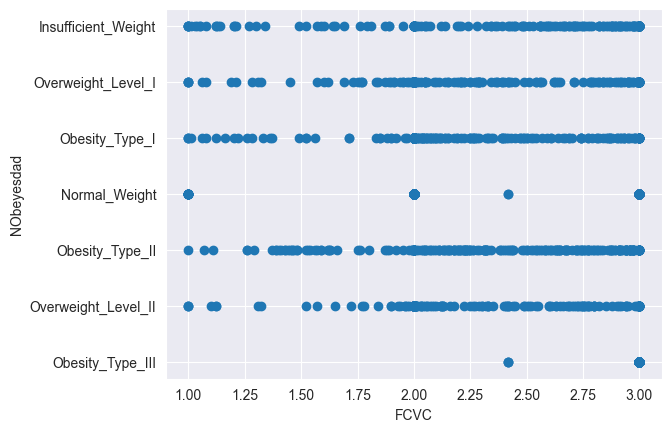

In [15]:
plt.scatter(df['FCVC'], df['NObeyesdad'])
plt.xlabel('FCVC')
plt.ylabel('NObeyesdad')
plt.show()

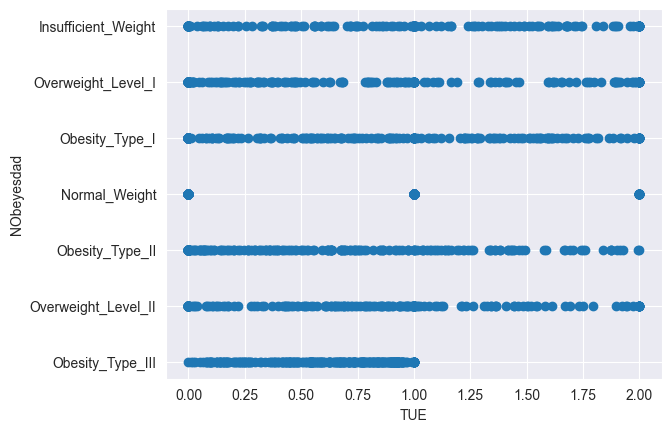

In [16]:
plt.scatter(df['TUE'], df['NObeyesdad'])
plt.xlabel('TUE')
plt.ylabel('NObeyesdad')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
for i in df:
    if df[i].dtype=='object':
        df[i] = encoder.fit_transform(df[i])
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,18,1.82,142.10,1,1,3.00,3.00,2,0,2.71,0,2.00,0.814,1,1,4
1,1,32,1.84,98.26,1,1,2.33,1.82,2,0,2.56,0,1.33,0.481,1,0,6
2,1,24,1.76,117.33,1,1,1.54,3.00,2,0,2.00,0,1.63,0.631,1,1,3
3,0,26,1.62,110.68,1,1,3.00,3.00,2,0,2.69,0,0.00,0.425,1,1,4
4,1,32,1.78,121.20,1,1,2.76,3.00,2,0,2.16,0,0.43,0.716,1,0,3


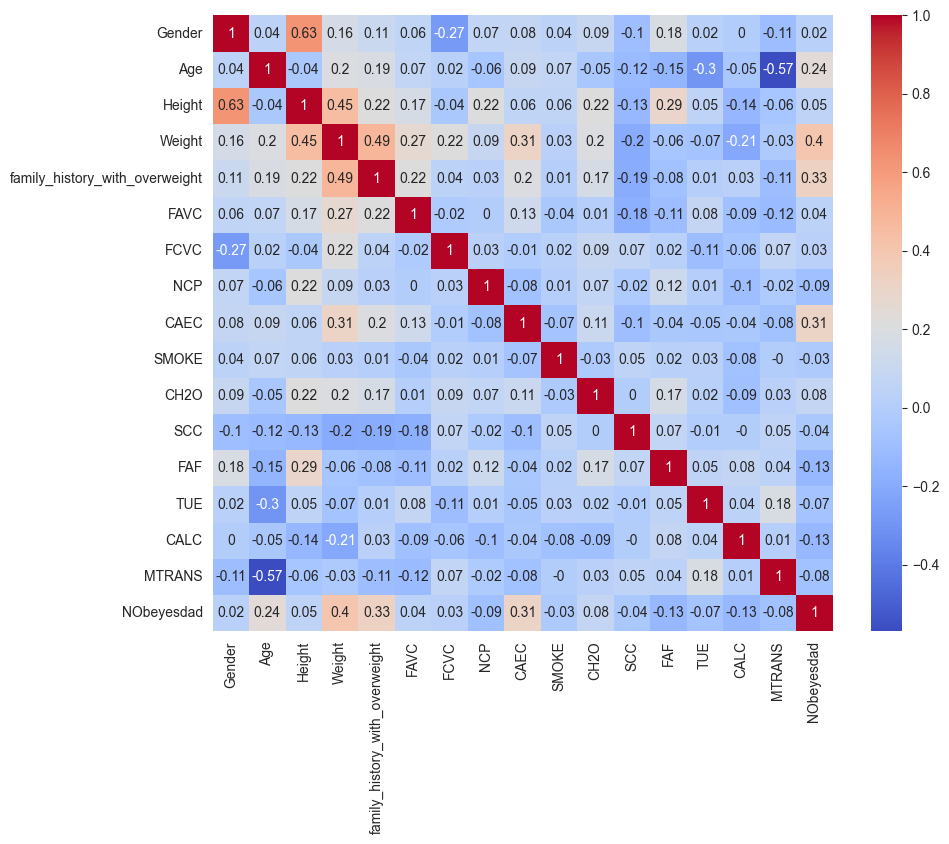

In [18]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr().round(2), annot = True, cmap = "coolwarm")
plt.show()

In [19]:
df = df.drop(columns=['SMOKE', 'SCC', 'Gender', 'TUE'])
# Smoke -> Vast majority doesn't smoke and the ratios are close
# SCC -> Vast majority doesn't monitor their calories and the ratios are close
# Height -> High correlation with gender
# TUE -> No enough variance

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

x = df.drop('NObeyesdad',axis=1)
y = df['NObeyesdad']
from sklearn.svm import SVC
from sklearn.metrics import f1_score , accuracy_score
scaler = StandardScaler()
x_train,x_validation,y_train,y_validation=train_test_split(x,y,test_size = 0.3, random_state = 42)
scaler.fit_transform(x_train)
scaler.fit_transform(x_validation)
svc = SVC(kernel = 'rbf', C = 10)
history = svc.fit(x_train,y_train)
y_pred = svc.predict(x_validation)
accuracy = accuracy_score(y_validation, y_pred)
print("Validation Accuracy: ", accuracy)

Validation Accuracy:  0.6294326241134752


In [21]:
df_test = pd.read_csv("test_dataset.csv")
encoder = LabelEncoder()
for i in df_test:
    if df_test[i].dtype=='object':
        df_test[i] = encoder.fit_transform(df_test[i])
scaler.fit_transform(df_test)
target = df_test['NObeyesdad']
df_test = df_test.drop(columns = ['SMOKE', 'SCC', 'Gender', 'TUE', 'NObeyesdad'])
predictions = svc.predict(df_test)
ans = 0
for i in range(predictions.shape[0]):
    ans += (predictions[i] == target[i])
matrix = confusion_matrix(target, predictions)
print(matrix)
print(predictions.shape[0], ans)

[[19  5  0  0  0  0  0]
 [10 14  0  0  0  6  2]
 [ 0  0 14  3  1  0 11]
 [ 0  0  4 28  6  0  0]
 [ 0  0  0  0 28  0  0]
 [ 0  6  1  0  0 12  7]
 [ 0  6  8  0  0  6 14]]
211 129
